In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_excel('BEAMSTRESSANALYSIS.xlsx',engine='openpyxl')

In [105]:
df.head()

,W,E,I,L,x,y,StressValue
0,120000,200000000000,0.004219,15,7.5,0.093750,0
1,120000,200000000000,0.004219,15,1.0,0.019828,780000
2,120000,200000000000,0.004219,15,2.0,0.038673,660000
3,120000,200000000000,0.004219,15,3.0,0.055680,540000
4,120000,200000000000,0.004219,15,4.0,0.070139,420000


In [106]:
df.describe()

,W,E,I,L,x,y,StressValue
count,190.000000,1.900000e+02,190.000000,190.000000,190.000000,190.000000,1.900000e+02
mean,396668.421053,3.124184e+11,0.004064,14.336842,7.665789,0.181959,-1.980184e+05
std,190297.936977,1.015914e+11,0.001272,4.563741,4.896834,0.226299,1.842795e+06
min,120000.000000,2.000000e+11,0.002156,6.000000,1.000000,0.000000,-5.320000e+06
25%,220000.000000,2.000000e+11,0.003235,10.000000,4.000000,0.021487,-1.247500e+06
50%,360000.000000,2.750000e+11,0.003535,14.000000,7.000000,0.085636,-1.175000e+05
75%,500000.000000,4.100000e+11,0.004219,19.000000,11.000000,0.246950,8.400000e+05
max,840000.000000,4.750000e+11,0.007156,20.000000,20.000000,0.785470,4.760000e+06


In [107]:
df.columns

Index(['W ', 'E', 'I', 'L', 'x', 'y', 'StressValue'], dtype='object')

In [108]:
X = df[['W ','E','I','L','x','y']]
y = df['StressValue']

In [109]:
X

,W,E,I,L,x,y
0,120000,200000000000,0.004219,15,7.5,0.093750
1,120000,200000000000,0.004219,15,1.0,0.019828
2,120000,200000000000,0.004219,15,2.0,0.038673
3,120000,200000000000,0.004219,15,3.0,0.055680
4,120000,200000000000,0.004219,15,4.0,0.070139
...,...,...,...,...,...,...
185,340000,400000000000,0.003235,10,6.0,0.032586
186,340000,400000000000,0.003235,10,7.0,0.027823
187,340000,400000000000,0.003235,10,8.0,0.020322
188,340000,400000000000,0.003235,10,9.0,0.010741


In [110]:
y

0            0
1       780000
2       660000
3       540000
4       420000
        ...   
185    -340000
186    -680000
187   -1020000
188   -1360000
189   -1700000
Name: StressValue, Length: 190, dtype: int64

## Split the data into training and testing sets

In [111]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBOOST

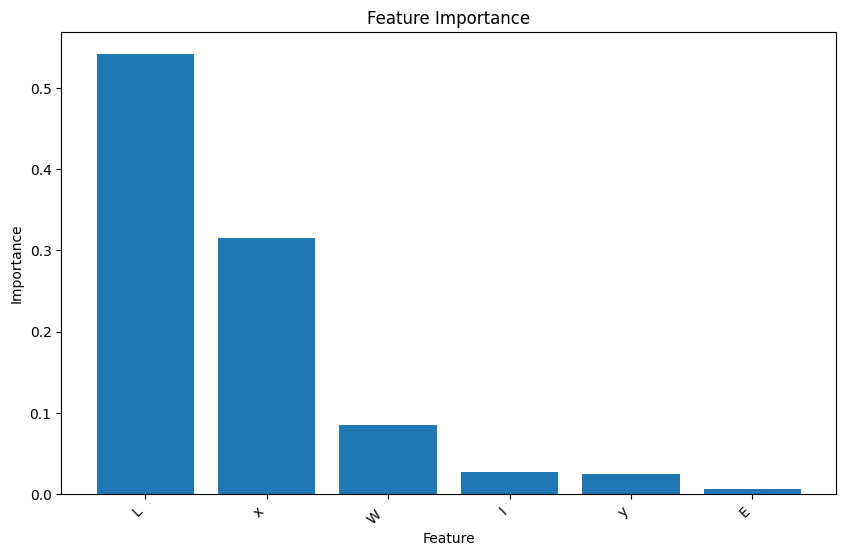

In [112]:

import matplotlib.pyplot as plt


# Initialize the XGBoost regressor
model= xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [113]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 137873476054.6357


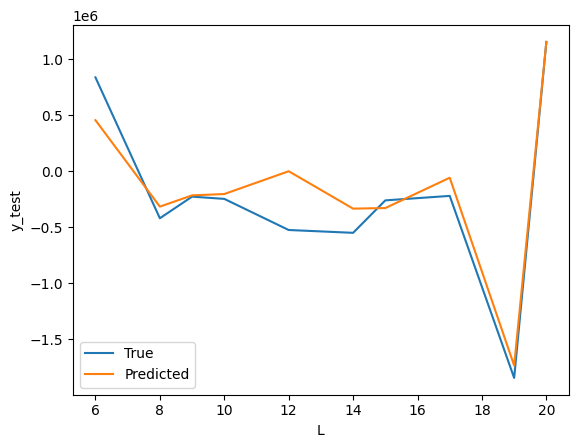

In [114]:
new_df = X_test.copy()
new_df['y_test'] = y_test
new_df['y_pred'] = y_pred
sns.lineplot(x=new_df['L'],y=new_df['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_df['L'],y=new_df['y_pred'], errorbar=None, label='Predicted')
plt.show()

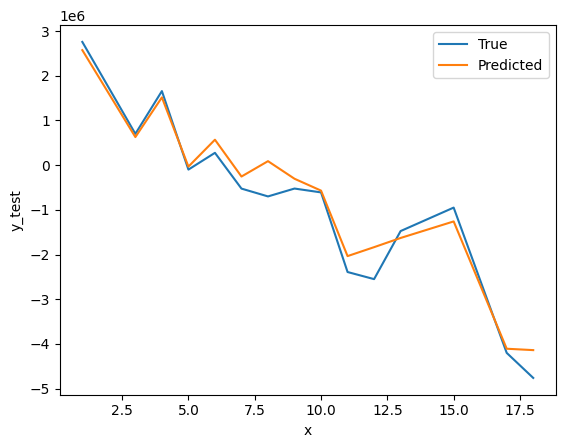

In [115]:
new_df = X_test.copy()
new_df['y_test'] = y_test
new_df['y_pred'] = y_pred
sns.lineplot(x=new_df['x'],y=new_df['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_df['x'],y=new_df['y_pred'], errorbar=None, label='Predicted')
plt.show()

 # Decision Tree Regressor

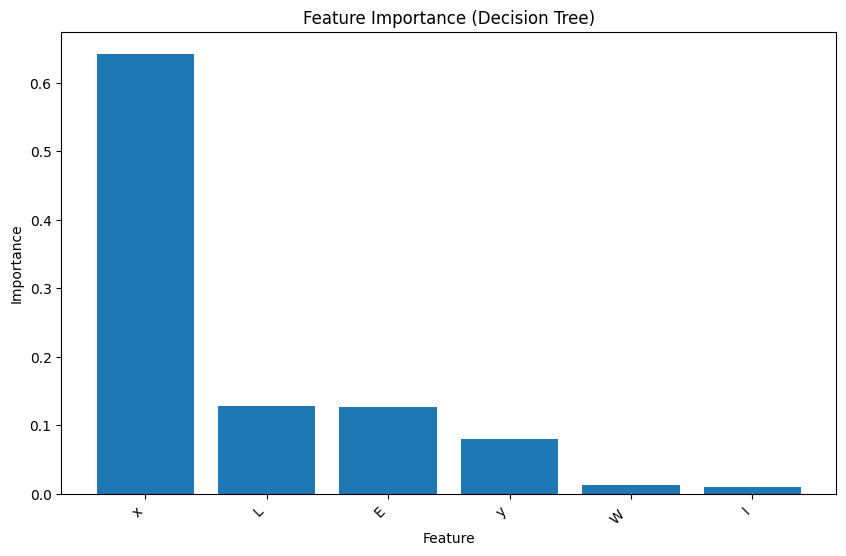

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)
y_pred_DT = model.predict(X_test)
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [117]:
mse = mean_squared_error(y_test, y_pred_DT)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 189262085526.3158


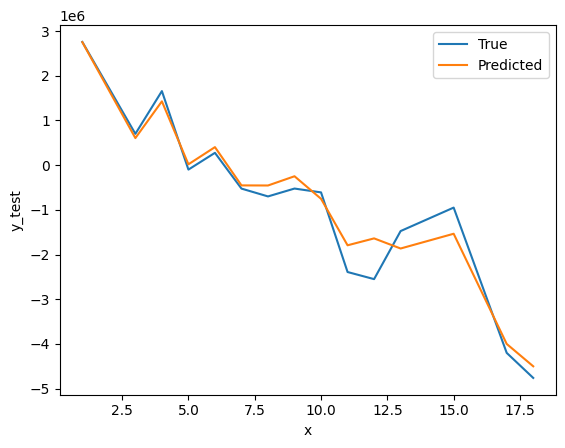

In [118]:
new_dfDTR = X_test.copy()
new_dfDTR['y_test'] = y_test
new_dfDTR['y_pred'] = y_pred_DT
sns.lineplot(x=new_dfDTR['x'],y=new_dfDTR['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfDTR['x'],y=new_dfDTR['y_pred'], errorbar=None, label='Predicted')
plt.show()

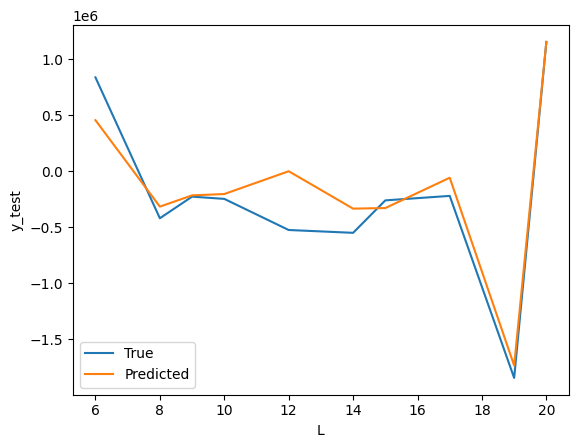

In [122]:
new_dfDTR = X_test.copy()
new_dfDTR['y_test'] = y_test
new_dfDTR['y_pred'] = y_pred
sns.lineplot(x=new_dfDTR['L'],y=new_dfDTR['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfDTR['L'],y=new_dfDTR['y_pred'], errorbar=None, label='Predicted')
plt.show()